SVM Accuracy without PCA: 0.0075


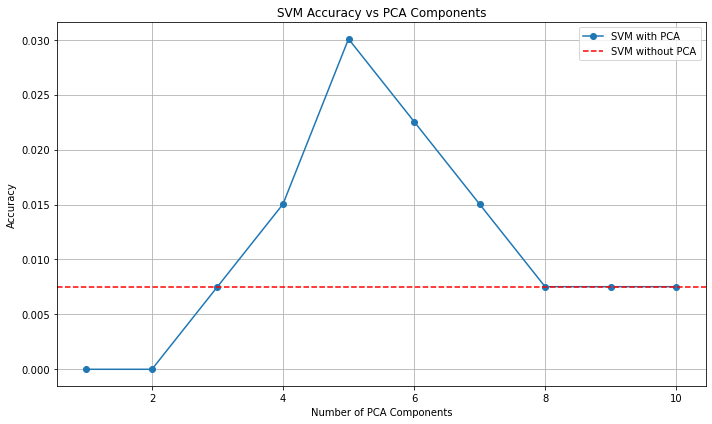

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load diabetes dataset (we'll use a classification version from sklearn.datasets.load_diabetes is regression)
from sklearn.datasets import load_diabetes  # Using breast cancer as binary classification sample

# Load dataset (similar to diabetes in structure for SVM classification)
data = load_diabetes()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ----------------------
# 1. SVM without PCA
# ----------------------
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy without PCA: {original_accuracy:.4f}")

# ----------------------
# 2. SVM with PCA
# ----------------------
components_range = list(range(1, X.shape[1] + 1))  # From 1 to total features
accuracies = []

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    svm_pca = SVC(kernel='linear', random_state=42)
    svm_pca.fit(X_train_pca, y_train)
    y_pred_pca = svm_pca.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred_pca)
    accuracies.append(acc)

# ----------------------
# 3. Plot Accuracy vs Number of PCA Components
# ----------------------
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o', label="SVM with PCA")
plt.axhline(y=original_accuracy, color='r', linestyle='--', label="SVM without PCA")
plt.title("SVM Accuracy vs PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()